## Final Project Submission

Please fill out:
* Student name: Vivian Jepketer Maiyo
* Student pace: Part time
* Scheduled project review date/time: Not scheduled
* Instructor name: Everlyne Asiko
* Blog post URL: NA


# Movies Data Analysis

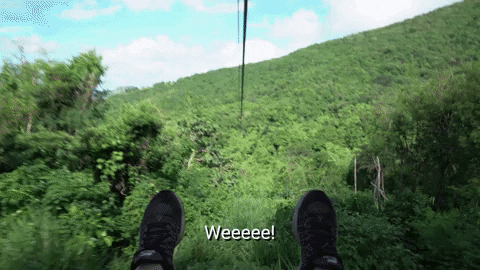

# Overview

This project analyzes movies data to come up with a recommendation on the best film genre for Microsoft's new movie studio. It takes into account film genres, ratings, runtime, cost of production and revenue to come up with the most ideal film genres for production. Our Analysis dataset contains movie data between the years 2010 and 2019 from IMDb movies and The Numbers.

# Business Problem

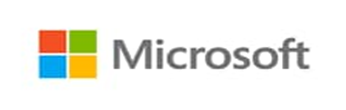

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


# Data

We are using imdb.title.basics and imdb.title.ratings data sets from IMDB Movies and tn.movie.budgets data from The Numbers to study the relatationship between film genres, ratings and return on investment.

# Data Preparation

Let us import the libraries that we will be using for data cleaning, analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.available
import seaborn as sns

Next, we shall load the data sets that we will need. For this project, we shall be using the data sets;
    imdb.title.basics as df1,
    imdb.title.ratings as df2,
    tn.movies.budgets as df3,


In [2]:
df1= pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
df1.shape

(146144, 6)

The data set has 146,144 records with 6 atributes. Lets view more information on the attributes use .info() method

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
df1.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
#Q3 = 95
#Q1 = 75
#IQR = Q3 - Q1
#IQR
#20

In [8]:
#print(Q1 - IQR*1.5) #45
#print(Q3 + IQR*1.5) #125

In [9]:
len(df1[df1['runtime_minutes'] <15])

2089

In [10]:
len(df1[df1['runtime_minutes'] >1500])

18

The minimum runtime is 1, whereas the maximum runtime is 51420. These values appear unreleastic, and could probably be placeholders or typos. There are 5891/140729 which is 4.18% of the data (values less than 45 mins)outliers in the dataset. For the purposes of this analysis, we will only drop rows with less than 15 minutes runtime (seems more unrealistic in realworld), as outliers might represent natural variations in the poputation. We shall also drop rows with runtime values greater than 1500 minutes.

In [11]:
df1 = df1[(df1['runtime_minutes'] >=15) & (df1['runtime_minutes']<=1500)]
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [12]:
df1.describe()

,start_year,runtime_minutes
count,112298.000000,112298.000000
mean,2014.384121,86.582450
std,2.641270,30.760859
min,2010.000000,15.000000
25%,2012.000000,71.000000
50%,2014.000000,87.000000
75%,2017.000000,100.000000
max,2022.000000,1440.000000


The data set contains columns with missing values. We shall replace runtime with mean then drop missing values in 'original_title' and 'genres' columns since they are an insignificant number (0.01% & 3% respectively). 

In [13]:
#first, lets fill the runtime_minutes column
df1['runtime_minutes'].fillna(df1['runtime_minutes'].mean(), inplace = True)

In [14]:
#Next, lets drop rows with null values.
df1.dropna(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110130 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           110130 non-null  object 
 1   primary_title    110130 non-null  object 
 2   original_title   110130 non-null  object 
 3   start_year       110130 non-null  int64  
 4   runtime_minutes  110130 non-null  float64
 5   genres           110130 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.9+ MB


In [15]:
df1.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [16]:
#lets check if there is any start year greater than current year
len(df1[df1['start_year'] >2023])

0

In [17]:
df1.describe(include = 'all')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
count,110130,110130,110130,110130.000000,110130.000000,110130
unique,110130,103643,105047,NaN,NaN,1033
top,tt2589640,Home,Broken,NaN,NaN,Documentary
freq,1,18,14,NaN,NaN,23824
mean,NaN,NaN,NaN,2014.389394,86.662281,NaN
std,NaN,NaN,NaN,2.643005,30.696081,NaN
min,NaN,NaN,NaN,2010.000000,15.000000,NaN
25%,NaN,NaN,NaN,2012.000000,71.000000,NaN
50%,NaN,NaN,NaN,2014.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,100.000000,NaN


Our dataset has data from the years 2010 to 2022 and contains 110,130 records with 6 attributes.

In [18]:
df2= pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
df2.shape

(73856, 3)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The data set imdb.title.ratings has 73856 records with 3 attributes. .info() method shows no missing values. Lets check using .describe() method to find out if there are any placeholders.

In [21]:
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The column 'numvotes' seem to contain extreme data values (min = 5 while max = 1,841,066), we shall however not dwell on it as we are not using the column for our analysis today.

Now, lets load our third dataset tn.movie_budgets

In [22]:
df3= pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
#remove the dollar sign in column indexes 6,7 & 8
df3['production_budget'] = df3['production_budget'].str.replace('$','').str.replace(',','')
df3['domestic_gross'] = df3['domestic_gross'].str.replace('$','').str.replace(',','')
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace('$','').str.replace(',','')

In [24]:
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [25]:
df3.shape

(5782, 6)

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data set tn.movie_budgets has 5782 records with 6 non-null attributes. Some attributes (production_budget, domestic_gross, worldwide_gross) are stored as objects instead of integers. We shall use the pd.to_numeric() function to convert the data type from string to integer.

In [27]:
#convert the columns to integers
df3['production_budget'] = pd.to_numeric(df3['production_budget'])
df3['domestic_gross'] = pd.to_numeric(df3['domestic_gross'])
df3['worldwide_gross'] = pd.to_numeric(df3['worldwide_gross'])

In [28]:
#confirm the data types have been converted
df3.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [30]:
df3.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",King Kong,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


The minimum value for both domestic and worldwide gross is zero. Lets count the number of rows with zero to confirm that zero is not used as a placeholder for a missing value

In [31]:
len(df3[df3['domestic_gross'] <= 0])

548

In [32]:
len(df3[df3['worldwide_gross'] <= 0])

367

Ther are 548 records in domestic_gross (9.5%) and 367 (6.3%) records in worldwide_gross recorded as zero. These values appear to be placeholders. Lets replace them with the column means, since the percentange of the records to be replaced is low and may not affect our parameters greatly.

In [33]:
df3.loc[df3['domestic_gross'] <= 0,'domestic_gross'] = df3['domestic_gross'].mean()

In [34]:
df3.loc[df3['worldwide_gross'] <= 0,'worldwide_gross'] = df3['worldwide_gross'].mean()

In [35]:
df3.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",King Kong,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.584195e+07,9.729443e+07
std,28.821076,NaN,NaN,4.181208e+07,6.689408e+07,1.730953e+08
min,1.000000,NaN,NaN,1.100000e+03,3.880000e+02,2.600000e+01
25%,25.000000,NaN,NaN,5.000000e+06,5.609102e+06,8.210838e+06
50%,50.000000,NaN,NaN,1.700000e+07,2.768800e+07,3.863768e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


# Merging Datasets

We shall merge data sets imdb.title.basics and imdb.title.ratings to enable us analyze the relationship between genres, runtime in minutes and movie popularity denoted by average rating. We will use the merge method to combine df1 and df2. Afterwards we shall join the tn.movies.budgets to analyze the cost of production and revenue by Genre.

In [36]:
df = pd.merge(df1,df2)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65642 entries, 0 to 65641
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65642 non-null  object 
 1   primary_title    65642 non-null  object 
 2   original_title   65642 non-null  object 
 3   start_year       65642 non-null  int64  
 4   runtime_minutes  65642 non-null  float64
 5   genres           65642 non-null  object 
 6   averagerating    65642 non-null  float64
 7   numvotes         65642 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [38]:
dup_df = df.duplicated().any()
dup_df

False

In [39]:
from pandas import Series, DataFrame

In [40]:
#We notice some rows that have more than one movie genre, lets separate
s = df['genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df['genres']
df = df.join(s)

In [41]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Drama


In [42]:
#Lets check the shape of our new dataset
df.shape

(118297, 8)

#  Exploratory Data Analysis & Data Visualization

First, we will check overall descriptive statistics of the numerical columns and also whether there is any correlation between the numerical columns

In [43]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,118297.000000,118297.000000,118297.000000,1.182970e+05
mean,2014.196269,94.635992,6.293012,5.793603e+03
std,2.561618,24.570481,1.445889,3.966349e+04
min,2010.000000,15.000000,1.000000,5.000000e+00
25%,2012.000000,82.000000,5.400000,1.800000e+01
50%,2014.000000,92.000000,6.400000,7.900000e+01
75%,2016.000000,105.000000,7.300000,5.120000e+02
max,2019.000000,1440.000000,10.000000,1.841066e+06


In [44]:
df[df['runtime_minutes'] >1000]

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genres
13816,tt2008009,The Clock,The Clock,2010,1440.0,8.9,219,Drama
63628,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,8.6,5,Comedy
63628,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,8.6,5,History


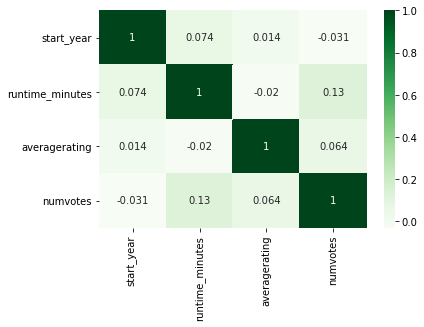

In [45]:
#lets display correlation using heatmap
sns.heatmap(df.corr(),annot = True, cmap='Greens');

Even tough there seems to be some correlation among attributes, there are not strongly correlated.

# Total Films Per Genre

Next, we shall investigate the popular genre amongst film producers. To do this, lets find the total counts of films by genre.

In [46]:
#Lets investigate the total film count per genre over the years
Film_Genre = df['genres'].value_counts()
Film_Genre 

Drama          28382
Documentary    16348
Comedy         15510
Thriller        7583
Horror          6917
Action          6296
Romance         5975
Crime           4338
Biography       3676
Adventure       3619
Family          3228
Mystery         2888
History         2698
Sci-Fi          2048
Fantasy         1968
Music           1841
Animation       1609
Sport           1095
War              793
Musical          637
News             574
Western          256
Reality-TV        13
Adult              2
Game-Show          2
Short              1
Name: genres, dtype: int64

The Drama genre is the most popular film genre amongst film producers. It had the highest film count, followed by Documentary then comedy. Below is a barplot visualization of the top 10 genres by film count.

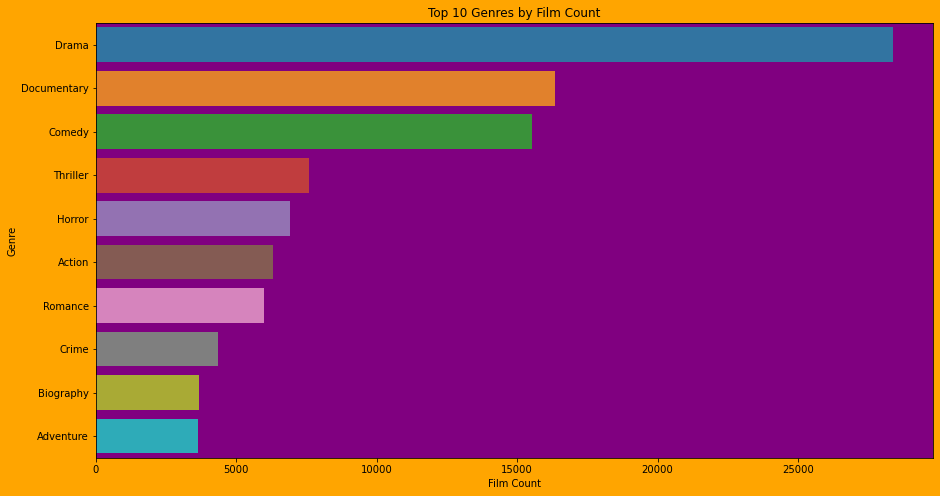

In [47]:
plt.figure(facecolor = "orange",figsize = (15, 8))

ax= sns.barplot(
    x = Film_Genre.head(10).values, 
    y = Film_Genre.head(10).index
)
ax.set(xlabel='Film Count',
       ylabel='Genre', 
       title='Top 10 Genres by Film Count')
ax.set_facecolor("purple")
plt.style.use('ggplot')
plt.show()

# Average Rating by Genre

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
#find the average rating by Genre
rating = df.groupby('genres')['genres','averagerating'].mean()
rating = rating.sort_values(by='averagerating',ascending=False)
rating = rating.head(10)
rating

,averagerating
genres,
Short,8.800000
Documentary,7.317256
Game-Show,7.300000
News,7.278571
Biography,7.169070
Music,7.070288
History,7.048443
Sport,6.962466
Reality-TV,6.600000


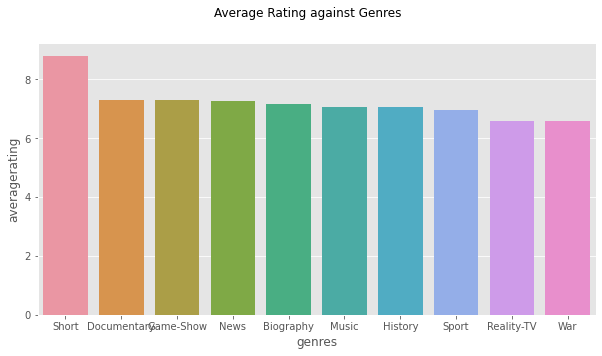

In [50]:
#plot a bar graph for the top 10 rating by Genre
plt.figure(figsize=(10,5))
sns.barplot(rating.head(10).index,rating['averagerating']) 
plt.suptitle('Average Rating against Genres')
plt.show()

The most produced genre did not necessarily get the best rating. Out the three genres with highest film, only documentaries had a higher rating.

# Correlation between Runtime and Rating

We will use a scatter plot to visualize the correlation between runtime and rating

In [51]:
# find the average rating and average runtime by genre
s_df = df.groupby('genres')['runtime_minutes','averagerating'].mean()
s_df = s_df.sort_values(by='runtime_minutes',ascending=False)
s_df

,runtime_minutes,averagerating
genres,,
Game-Show,117.000000,7.300000
Musical,104.527473,6.519937
Action,104.018107,5.784133
Romance,103.365690,6.147464
Crime,99.509912,6.110742
Drama,98.472165,6.391142
War,97.242119,6.572131
Comedy,97.234881,6.013701
Thriller,96.414084,5.592140


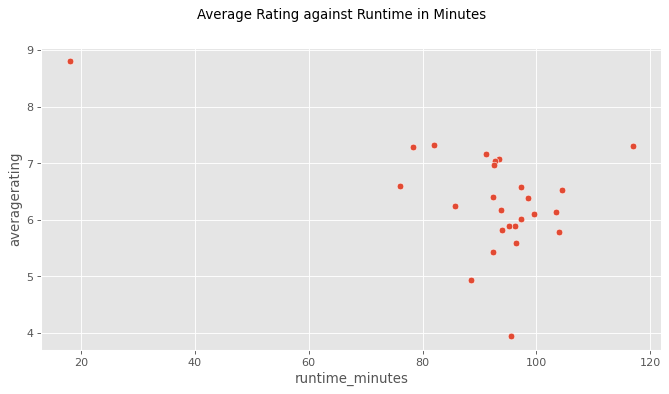

In [52]:
plt.figure(figsize=(10,5), dpi = 80)
sns.scatterplot(x='runtime_minutes',y='averagerating',data=s_df)
plt.suptitle('Average Rating against Runtime in Minutes')
plt.show()

From the above scatter plot, the average rating does not necessarily depend on runtime. The plot shows weak negative correlation.
Lets use a line graph to show that there is no linear relationship between runtime and average rating.

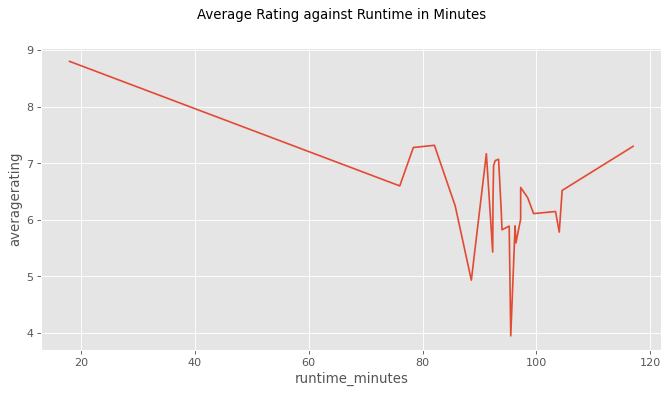

In [53]:
plt.figure(figsize=(10,5),dpi = 80)
sns.lineplot(s_df['runtime_minutes'],s_df['averagerating'])
plt.suptitle('Average Rating against Runtime in Minutes')
plt.show()

# Classify Movies Based on Ratings [Good,Better and Best]

In [54]:
def rating(averagerating):
    if averagerating>=7.0:
        return 'Excellent'
    elif averagerating>=6.0:
        return 'Good'
    else:
        return 'Average'
df['rating_cat'] = df['averagerating'].apply(rating)

In [55]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genres,rating_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Action,Excellent
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Crime,Excellent
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Drama,Excellent
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Biography,Excellent
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Drama,Excellent


# Cost analysis by Genre

Now, lets join our tn.movies.budgets as df3 data and analyze the cost of production and revenue by genre.

In [56]:
data = pd.merge(df, df3, left_on = 'primary_title', right_on = 'movie' )
data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genres,rating_cat,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,1.9,8248,Action,Average,26,"Dec 31, 2012",Foodfight!,45000000,4.187333e+07,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,1.9,8248,Animation,Average,26,"Dec 31, 2012",Foodfight!,45000000,4.187333e+07,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,1.9,8248,Comedy,Average,26,"Dec 31, 2012",Foodfight!,45000000,4.187333e+07,73706.0
3,tt0337692,On the Road,On the Road,2012,124.0,6.1,37886,Adventure,Good,17,"Mar 22, 2013",On the Road,25000000,7.208280e+05,9313302.0
4,tt0337692,On the Road,On the Road,2012,124.0,6.1,37886,Drama,Good,17,"Mar 22, 2013",On the Road,25000000,7.208280e+05,9313302.0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6287 entries, 0 to 6286
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6287 non-null   object 
 1   primary_title      6287 non-null   object 
 2   original_title     6287 non-null   object 
 3   start_year         6287 non-null   int64  
 4   runtime_minutes    6287 non-null   float64
 5   averagerating      6287 non-null   float64
 6   numvotes           6287 non-null   int64  
 7   genres             6287 non-null   object 
 8   rating_cat         6287 non-null   object 
 9   id                 6287 non-null   int64  
 10  release_date       6287 non-null   object 
 11  movie              6287 non-null   object 
 12  production_budget  6287 non-null   int64  
 13  domestic_gross     6287 non-null   float64
 14  worldwide_gross    6287 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 785.9+ KB


Our dataset has 6287 records with 15 attributes. We shall drop the columns that we do not require in our analysis.

In [58]:
data.drop(['primary_title','numvotes','id','movie'], axis = 1)

,tconst,original_title,start_year,runtime_minutes,averagerating,genres,rating_cat,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,1.9,Action,Average,"Dec 31, 2012",45000000,4.187333e+07,73706.0
1,tt0249516,Foodfight!,2012,91.0,1.9,Animation,Average,"Dec 31, 2012",45000000,4.187333e+07,73706.0
2,tt0249516,Foodfight!,2012,91.0,1.9,Comedy,Average,"Dec 31, 2012",45000000,4.187333e+07,73706.0
3,tt0337692,On the Road,2012,124.0,6.1,Adventure,Good,"Mar 22, 2013",25000000,7.208280e+05,9313302.0
4,tt0337692,On the Road,2012,124.0,6.1,Drama,Good,"Mar 22, 2013",25000000,7.208280e+05,9313302.0
...,...,...,...,...,...,...,...,...,...,...,...
6282,tt8941440,Virus,2019,152.0,8.6,Drama,Excellent,"Jan 15, 1999",75000000,1.401069e+07,30626690.0
6283,tt8941440,Virus,2019,152.0,8.6,Thriller,Excellent,"Jan 15, 1999",75000000,1.401069e+07,30626690.0
6284,tt8976772,Push,2019,92.0,7.3,Documentary,Excellent,"Feb 6, 2009",38000000,3.181153e+07,49678401.0
6285,tt9024106,Unplanned,2019,106.0,6.3,Biography,Good,"Mar 29, 2019",6000000,1.810762e+07,18107621.0


From the above dataframe, we shall create a dataframe with average rating, production budget, domestic gross and world wide gross by genre

In [59]:
genre_cost = data.groupby(
    'genres')['genres','averagerating','production_budget','domestic_gross','worldwide_gross'].mean()\
    .sort_values(by = 'averagerating', ascending=True)
genre_cost = genre_cost.reset_index('genres')
genre_cost

,genres,averagerating,production_budget,domestic_gross,worldwide_gross
0,Horror,5.351977,1.817108e+07,3.848260e+07,8.044402e+07
1,Thriller,5.843408,2.736711e+07,4.012727e+07,9.391977e+07
2,Fantasy,6.008721,7.007436e+07,8.266031e+07,2.229422e+08
3,Mystery,6.016742,2.137133e+07,3.806949e+07,8.006978e+07
4,Action,6.117292,6.605217e+07,7.691180e+07,2.005426e+08
5,Sci-Fi,6.155500,7.100522e+07,9.838018e+07,2.591188e+08
6,Comedy,6.177358,3.363656e+07,5.330739e+07,1.153136e+08
7,Family,6.217986,5.403068e+07,7.591595e+07,1.754672e+08
8,Crime,6.254875,2.767853e+07,3.672209e+07,7.530296e+07
9,Romance,6.280126,2.055426e+07,3.515228e+07,7.002700e+07


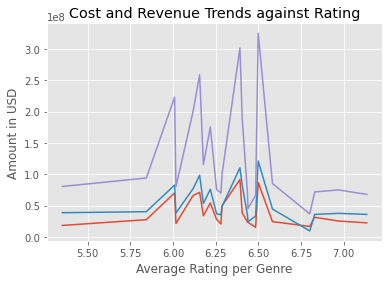

<Figure size 720x576 with 0 Axes>

In [60]:
x = genre_cost['averagerating']
y1 = genre_cost['production_budget']
y2 = genre_cost['domestic_gross']
y3 = genre_cost['worldwide_gross']

ax1 = plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.xlabel('Average Rating per Genre')
plt.ylabel('Amount in USD')
plt.title('Cost and Revenue Trends against Rating')
color=('DarkBlue','c','crimson')
plt.figure(figsize=(10, 8));
plt.show()

From the above graph, there is no direct relationship between  average rating and the cost of production and revenue. The cost and both revenues seem to be higher between rating 6 and 6.5, which is rated good. Further, the three parameters have the same trend in respect to rating.

# Revenue Trends for Top 10 Rated Genres

Lets examine a plot of top 10 Genres by rating and confirm whether high rating translates to high revenue. We shall use worldwide gross income for this analysis

In [61]:
#Lets re-sort our cost by genre data in descending order
genre_cost = data.groupby(
    'genres')['genres','averagerating','production_budget','domestic_gross','worldwide_gross'].mean()\
    .sort_values(by = 'averagerating', ascending=False)
genre_cost = genre_cost.reset_index('genres')

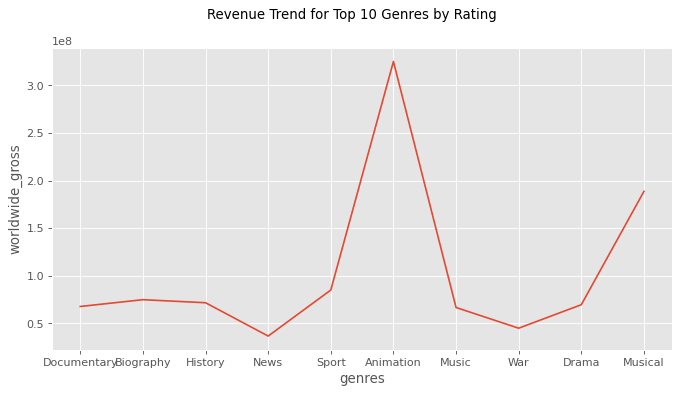

In [62]:
plt.figure(figsize=(10,5), dpi = 80)
sns.lineplot(genre_cost.head(10)['genres'],genre_cost.head(10)['worldwide_gross'])
plt.suptitle('Revenue Trend for Top 10 Genres by Rating')
plt.show()

There is no linear relationship between revenue and rating

# Production cost for Top 10 rated Genres

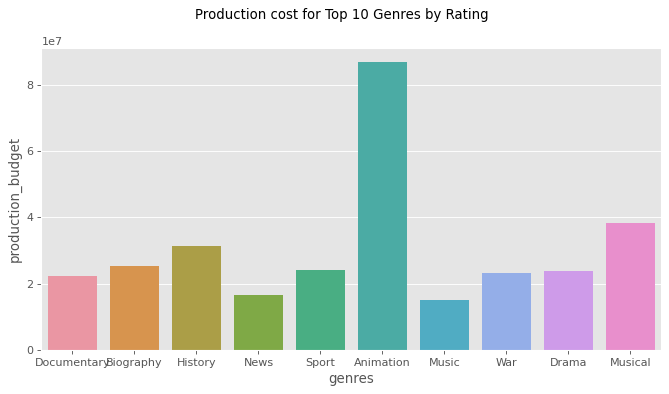

In [63]:
#lets examine the cost of production for top 10 genres by rating
plt.figure(figsize=(10,5), dpi = 80)
sns.barplot(genre_cost.head(10)['genres'],genre_cost.head(10)['production_budget'])
plt.suptitle('Production cost for Top 10 Genres by Rating')
plt.show()

The cost of production is relatively lower for highly rated Genres

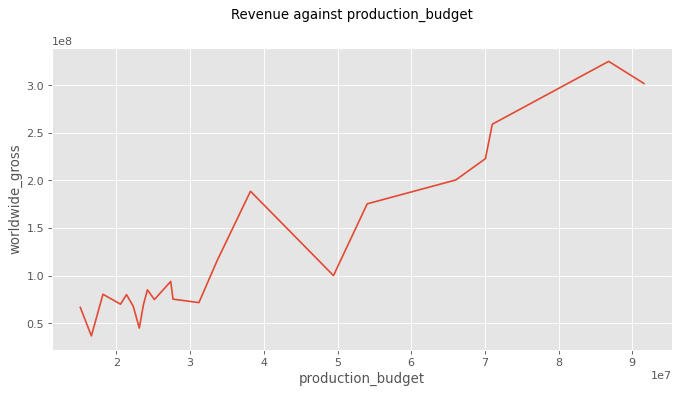

In [64]:
plt.figure(figsize=(10,5), dpi = 80)
sns.lineplot(x=genre_cost['production_budget'],y=genre_cost['worldwide_gross'],data=genre_cost)
plt.suptitle('Revenue against production_budget')
plt.show()

The revenue increases as cost of production increases

# Observations

The top three genres produced by Film producers are: 
•	Drama
•	Documentary 
•	Comedy.

There is no strong correlation between rating and runtime.


Films rated good are generally costly to produce than those rated excellent and average.

There is no linear relationship between film rating and gross revenue.

The genre Documentary performed better in all the analyses.

# Conclusion

Microsoft movie studio should consider producing films that are most popular by production numbers.

Microsoft to consider films rating when choosing film genres to produce. Films rated excellent are genarally produced at lower cost.

Revenue increased with cost of production. This implies that there is no significant change in profits as cost of production reduces. Hence, 

Generally, I would recomend Microsoft movie studio to produce documentaries. The genre showed good results in all the analysed parameters, which implies that it has the potential of selling better and generating higher Returns on Investment.

# Further Research

Further analysis to be done to determine the relationship between diffent movie genres and Return on investment

Analyze the effect of release date on ratings and Return on Investment

# References

https://www.kaggle.com


https://codingnomads.co/blog